# Data Cleaning

### Available data: Shot-by-shot stone positions from Curlit for:

- Beijing 2022 Olympic Winter Games
- World Mixed Doubles Curling Championship 2023
- World Mixed Doubles Curling Championship 2024
- World Mixed Doubles Curling Championship 2025

There are 26,000+ observations in the data which correspond to one throw during one end of a game in one of the competitions listed above. The data are stored as six CSV files and the columns contain the following information:

`Competition.csv`

- **CompetitionName** - Name of the competition
- **Place** - City/Country where the competition was completed
- **Venue** - Venue where the competition was competed
- **CompetitionID** - Unique ID for the competition

`Competitors.csv`

- **CompetitionID** – ID for the competition (from Competitions.csv).
- **TeamID** – ID for the team. Note: Team IDs across different competitions are associated with nations, not necessarily the individuals on that team.
- **NOC** – National Olympic Committee, the nation of the competing team.
- **Reportingname** – Name of the competing athlete (LAST NAME First Name) .

`Ends.csv`

- **CompetitionID** – ID for the competition (from Competitions.csv).
- **SessionID** – ID of the draw/round for the match.
- **GameID** - ID for the match. Note: A unique ID for a match can be made from a combination of Competition, Session and Game IDs.
- **TeamID** – ID for the team (from Teams.csv).
- **EndID** – ID for an end of the match.
- **Result** – The points scored by that team in the end.
- **PowerPlay** – A flag for when a team uses their power play in an end. A value of 1 corresponds to pre-placed stones being moved to the right side, 2 being pre-placed stones are moved to the left side. An empty value means the team is not using their power play.

`Games.csv`

- **CompetitionID** - ID for the competition (from Competitions.csv).
- **SessionID** - ID of the draw/round for the match.
- **GameID** - ID for the match. A unique ID for a match can be made from a combination of Competition, Session and Game IDs.
- **GroupID** – In competitions where teams are split into groups for play, the ID of the group for the teams in this match.
- **Sheet** – The name of the sheet on which the match is played.
- **NOC1** – National Olympic Committee of the first competing team.
- **NOC2** - National Olympic Committee of the second competing team.
- **ResultStr1** – Final Score of Team 1.
- **ResultStr2** – Final Score of Team 2.
- **LSFE** – Last Stone First End. This column indicates which team threw the last stone in the first end of the match. In curling parlance, this is called starting with “the hammer”. A 0 value means that NOC2 threw the last stone in the first end, a 1 means that NOC1 threw last.
- **Winner** – Indicates the winning team. 0 indicates that NOC2 won the match, 1 indicates that NOC1 won the match.
- **TeamID1** – ID for the team corresponding to NOC1 and ResultsStr1 (from Teams.csv).
- **TeamID2** - ID for the team corresponding to NOC2 and ResultsStr2 (from Teams.csv).

`Stones.csv`

- **CompetitionID** – ID of Competition in which match was competed (from Competitions.csv)
- **SessionID** – ID of the draw/round for the match.
- **GameID** – ID for the match. A unique ID for a match can be made from a combination of Competition, Session and Game IDs.
- **EndID** – The end in which the shot is taking place.
- **ShotID** – ID for the shot. Within a particular match and end, shots occur in ascending order of the ShotID values. (i.e. lower ShotIDs are thrown first)/
- **TeamID** – ID for the Team (from Teams.csv).
- **PlayerID** – ID for the player taking the shot (1 or 2).
- **Task** – The type of shot that the player is throwing, or the objective of the shot. Details to come.
  - "0": "Draw"
  - "1": "Front"
  - "2": "Guard"
  - "3": "Raise / Tap-back"
  - "4": "Wick / Soft Peeling"
  - "5": "Freeze"
  - "6": "Take-out"
  - "7": "Hit and Roll"
  - "8": "Clearing"
  - "9": "Double Take-out"
  - "10": "Promotion Take-out"
  - "11": "through"
  - "13": "no statistics"
- **Handle** – The turn of the stone as it is thrown. A 0 value means the shot is turning clockwise, a 1 indicates counterclockwise.
- **Points** – An assessment of the execution of the shot, ranging from 0 to 4. A 4-point shot is one that has been ascertained to have been perfectly executed to the player’s intention, while a 0 is a shot that totally failed in its intended result. Note that these points are not the same as points awarded to teams after ends, but simply an evaluation of a shot’s effectiveness.
- **TimeOut** – Binary variable for whether a time out was called before the shot.
- **Stone_{i}_x** – The x position of stone i on the sheet, after the stone for the row has been thrown. Stones can take x values in (0,1500). The value 4095 is a sentinel value indicating that the stone has been knocked off the sheet and is no longer in play. The value 0 indicates that the stone has not yet been thrown in this end.
- **Stone_{i}_y** – The y position of stone i on the sheet, after the stone for the row has been thrown. Stones can take y values in (0,3000). Again, the value 4095 indicates the stones have been knocked off the sheet and aren’t in play, and the value 0 indicates the stones have not yet been thrown.

*A Note on stones: Stone i does not necessarily correspond to ShotID i. The first six stones are the stones of the team that is throwing first in the end, while stones 7-12 are for the other team in that end. Stone_1 and Stone_7 are the pre-placed stones, and teams throw the rest of their stones in order. For example, a team going first in an end would have stones 2-6 and throw them in ascending order.*

*A curling sheet is marked by several important lines and positions that define gameplay and scoring.*


*Centerline (x = 750): Divides the sheet lengthwise and serves as a reference axis for all play.
Backline (y = 200): Marks the rear edge of the house; stones completely crossing it are out of play.
Hogline (y = 2900): Indicates the line that stones must completely cross to remain in play and where players must release the stone before delivery.
Button (x = 750, y = 800): Represents the center of the house, used as the reference point for scoring.*

`Teams.csv`

- **CompetitionID** - ID for the competition (from Competitions.csv).
- **TeamID** - ID for the Team (from Teams.csv).
- **NOC** - National Olympic Committee, the nation of the competing team.
- **Name** – Name of the country corresponding to NOC abbreviation.

In [1]:
import pandas as pd
import numpy as np

In [3]:
# Load CSVs
competitions = pd.read_csv('Competition.csv')
competitors = pd.read_csv('Competitors.csv')
ends = pd.read_csv('Ends.csv')
games = pd.read_csv('Games.csv')
stones = pd.read_csv('Stones.csv')
teams = pd.read_csv('Teams.csv')

# Merge
df = stones.copy()
df = df.merge(games, on=['CompetitionID', 'SessionID', 'GameID'], how='left')
df = df.merge(ends, on=['CompetitionID', 'SessionID', 'GameID', 'EndID', 'TeamID'], how='left')
df = df.merge(teams, on=['CompetitionID', 'TeamID'], how='left')
df = df.merge(competitions, on='CompetitionID', how='left')

# Handle competitors: since there are likely two players per team, pivot to create Player1_name and Player2_name
# We'll sort by Reportingname for deterministic order (alphabetical)
competitors_sorted = competitors.sort_values(by=['CompetitionID', 'TeamID', 'Reportingname'])
player_groups = competitors_sorted.groupby(['CompetitionID', 'TeamID'])
player_pivot = player_groups['Reportingname'].agg(list).reset_index()
player_pivot['Player1_name'] = player_pivot['Reportingname'].apply(lambda x: x[0] if len(x) > 0 else np.nan)
player_pivot['Player2_name'] = player_pivot['Reportingname'].apply(lambda x: x[1] if len(x) > 1 else np.nan)
player_pivot = player_pivot.drop(columns=['Reportingname'])

# Merge the pivoted players into df
df = df.merge(player_pivot, on=['CompetitionID', 'TeamID'], how='left')

# Add a column for the actual player name based on PlayerID in stones
df['Player_name'] = np.where(df['PlayerID'] == 1, df['Player1_name'], 
                             np.where(df['PlayerID'] == 2, df['Player2_name'], np.nan))

# Handle sentinel values in stone positions (e.g., replace 4095 with NaN for knocked off the sheet and 0 for not thrown yet)
for i in range(1, 13):  # Assuming 12 stones
    if f'Stone_{i}_x' in df.columns:
        df.loc[df[f'Stone_{i}_x'] == 4095, f'Stone_{i}_x'] = np.nan
        df.loc[df[f'Stone_{i}_y'] == 4095, f'Stone_{i}_y'] = np.nan
    if f'Stone_{i}_y' in df.columns:
        df.loc[df[f'Stone_{i}_x'] == 0, f'Stone_{i}_x'] = np.nan  # Or handle as not thrown
        df.loc[df[f'Stone_{i}_y'] == 0, f'Stone_{i}_y'] = np.nan

# Display the first few rows
pd.set_option('display.max_columns', None)
df.head()

,CompetitionID,SessionID,GameID,EndID,ShotID,TeamID,PlayerID,Task,Handle,Points,TimeOut,stone_1_x,stone_1_y,stone_2_x,stone_2_y,stone_3_x,stone_3_y,stone_4_x,stone_4_y,stone_5_x,stone_5_y,stone_6_x,stone_6_y,stone_7_x,stone_7_y,stone_8_x,stone_8_y,stone_9_x,stone_9_y,stone_10_x,stone_10_y,stone_11_x,stone_11_y,stone_12_x,stone_12_y,GroupID,Sheet,NOC1,NOC2,ResultStr1,ResultStr2,LSFE,Winner,TeamID1,TeamID2,Result,PowerPlay,NOC,Name,CompetitionName,Place,Venue,Player1_name,Player2_name,Player_name
0,0,1,1,1,7,19,1,0,0,0,NaN,750.0,1916.0,4095.0,4095.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,A,SWE,GBR,5,9,0,0,19,27,0,NaN,SWE,Sweden,Beijing 2022 Olympic Winter Games,"Beijing, China",National Aquatics Centre,DE VAL Almida,ERIKSSON Oskar,DE VAL Almida
1,0,1,1,1,8,27,1,0,1,2,NaN,750.0,1916.0,4095.0,4095.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,892.0,1232.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,A,SWE,GBR,5,9,0,0,19,27,1,NaN,GBR,Great Britain,Beijing 2022 Olympic Winter Games,"Beijing, China",National Aquatics Centre,DODDS Jennifer,MOUAT Bruce,DODDS Jennifer
2,0,1,1,1,9,19,2,0,0,4,NaN,750.0,1916.0,4095.0,4095.0,694.0,756.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,892.0,1232.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,A,SWE,GBR,5,9,0,0,19,27,0,NaN,SWE,Sweden,Beijing 2022 Olympic Winter Games,"Beijing, China",National Aquatics Centre,DE VAL Almida,ERIKSSON Oskar,ERIKSSON Oskar
3,0,1,1,1,16,27,2,0,0,0,NaN,963.0,1657.0,4095.0,4095.0,694.0,756.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,892.0,1232.0,418.0,1608.0,0.0,0.0,0.0,0.0,0.0,0.0,0,A,SWE,GBR,5,9,0,0,19,27,1,NaN,GBR,Great Britain,Beijing 2022 Olympic Winter Games,"Beijing, China",National Aquatics Centre,DODDS Jennifer,MOUAT Bruce,MOUAT Bruce
4,0,1,1,1,17,19,2,7,0,3,NaN,963.0,1657.0,4095.0,4095.0,694.0,756.0,636.0,1080.0,0.0,0.0,0.0,0.0,750.0,650.0,4095.0,0.0,418.0,1608.0,0.0,0.0,0.0,0.0,0.0,0.0,0,A,SWE,GBR,5,9,0,0,19,27,0,NaN,SWE,Sweden,Beijing 2022 Olympic Winter Games,"Beijing, China",National Aquatics Centre,DE VAL Almida,ERIKSSON Oskar,ERIKSSON Oskar


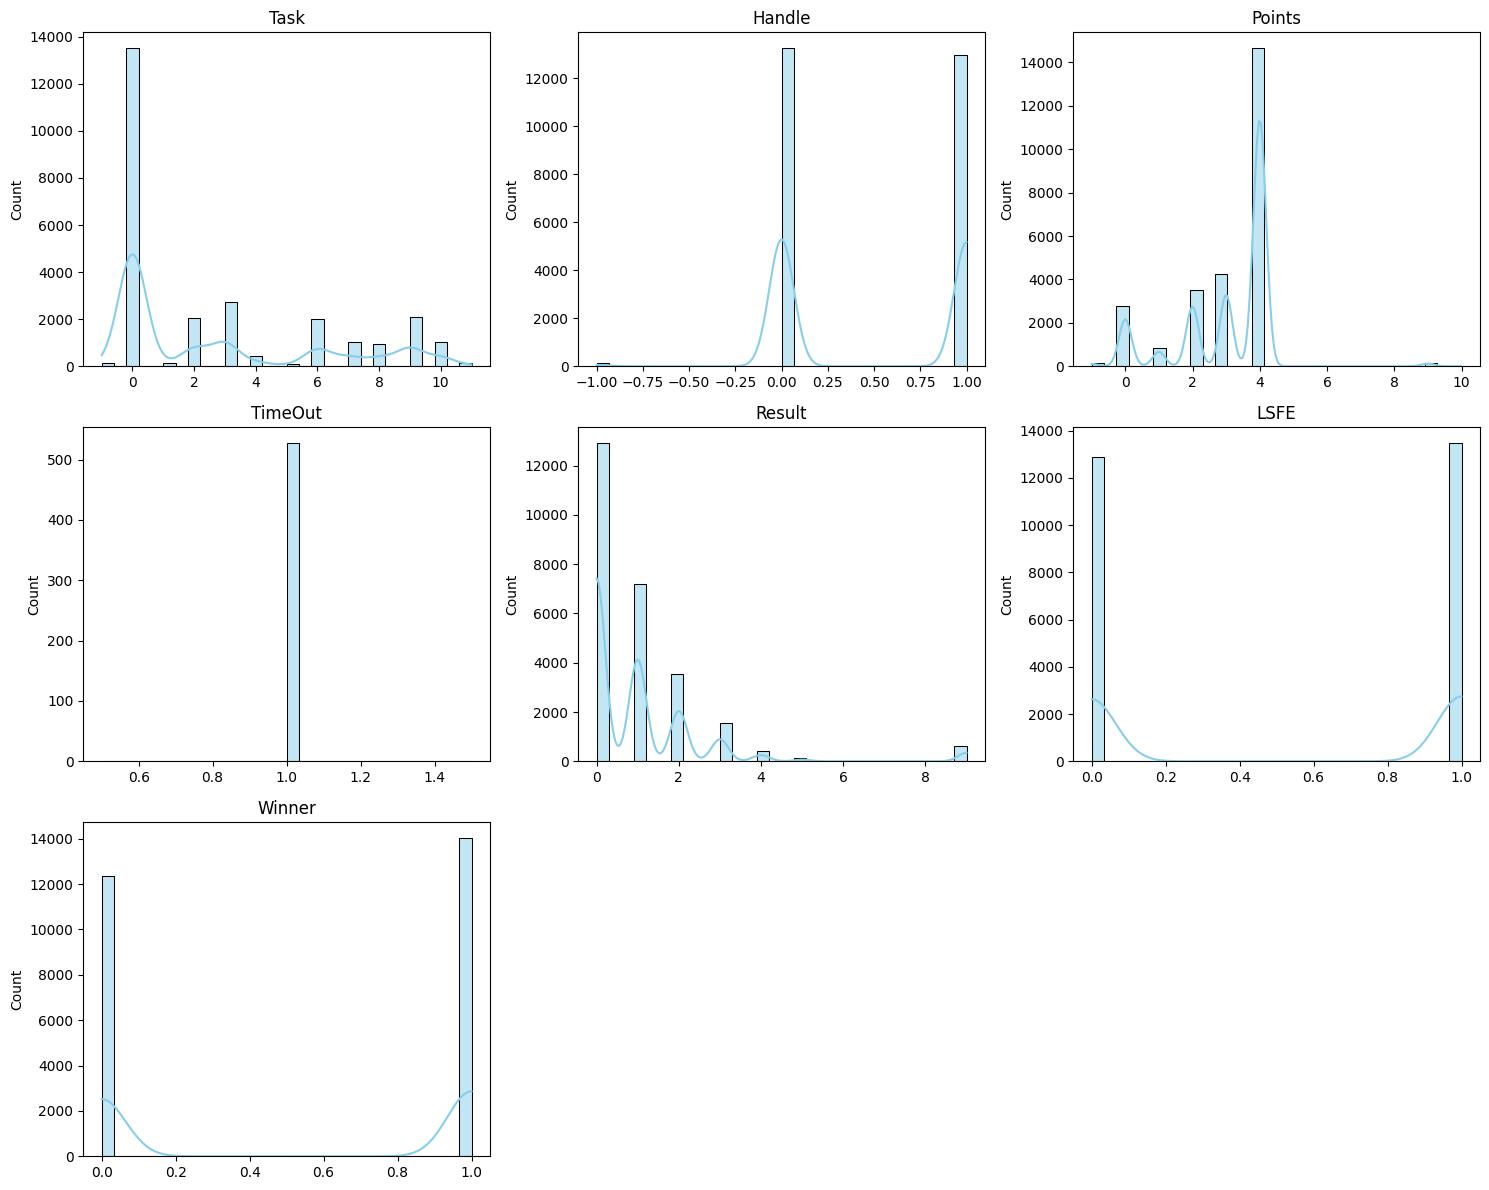

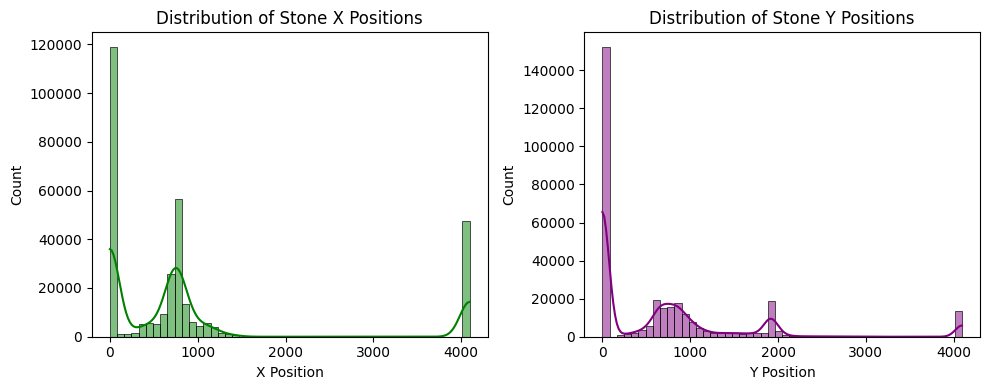

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Select numeric columns of interest relevant to curling analytics
numeric_cols = [
    'Task',          # Shot type (0-13)
    'Handle',        # Turn (0 or 1)
    'Points',        # Shot execution (0-4)
    'TimeOut',       # Whether timeout called (0/1)
    'Result',        # Points scored in the end
    'LSFE',          # Last stone first end (0/1, game-level)
    'Winner'         # Game winner (0/1, game-level)
]

# Filter to ensure only numeric (in case of any issues)
numeric_cols = [col for col in numeric_cols if pd.api.types.is_numeric_dtype(df[col])]

# Set up the plot grid
num_cols = 3  # number of plots per row
num_rows = (len(numeric_cols) + num_cols - 1) // num_cols
plt.figure(figsize=(num_cols * 5, num_rows * 4))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Optional: Visualize distributions of all in-play stone positions (x and y)
# This melts the position columns and plots overall distributions

x_cols = [f'stone_{i}_x' for i in range(1, 13)]
y_cols = [f'stone_{i}_y' for i in range(1, 13)]

# Melt and drop NaNs (assuming you replaced 0/4095 with NaN earlier)
df_x = pd.melt(df, value_vars=x_cols)['value'].dropna()
df_y = pd.melt(df, value_vars=y_cols)['value'].dropna()

# Plot for x and y
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(df_x, kde=True, bins=50, color='green', ax=axes[0])
axes[0].set_title('Distribution of Stone X Positions')
axes[0].set_xlabel('X Position')
axes[0].set_ylabel('Count')

sns.histplot(df_y, kde=True, bins=50, color='purple', ax=axes[1])
axes[1].set_title('Distribution of Stone Y Positions')
axes[1].set_xlabel('Y Position')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

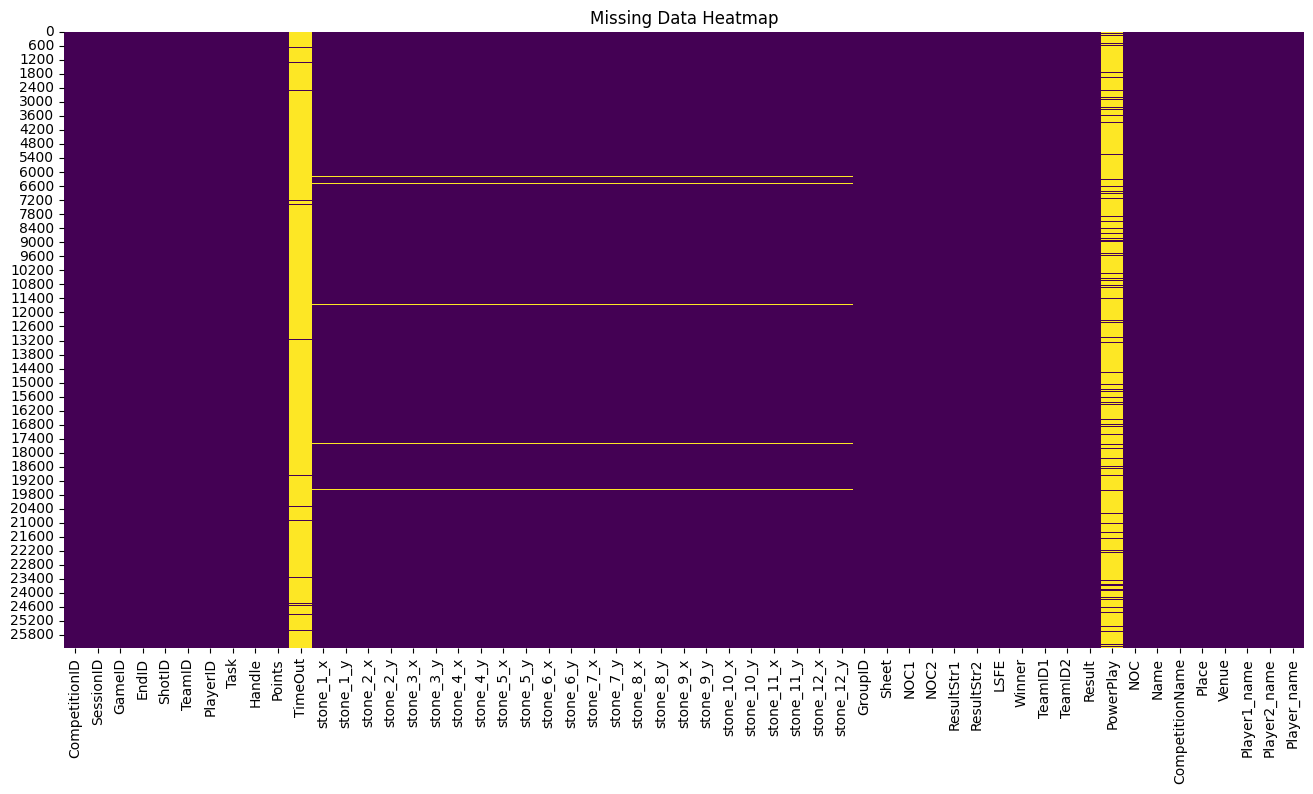

In [6]:
# Create a heatmap of missing values
plt.figure(figsize=(16,8))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()

In [8]:
df.describe()

,CompetitionID,SessionID,GameID,EndID,ShotID,TeamID,PlayerID,Task,Handle,Points,TimeOut,stone_1_x,stone_1_y,stone_2_x,stone_2_y,stone_3_x,stone_3_y,stone_4_x,stone_4_y,stone_5_x,stone_5_y,stone_6_x,stone_6_y,stone_7_x,stone_7_y,stone_8_x,stone_8_y,stone_9_x,stone_9_y,stone_10_x,stone_10_y,stone_11_x,stone_11_y,stone_12_x,stone_12_y,GroupID,ResultStr1,ResultStr2,LSFE,Winner,TeamID1,TeamID2,Result,PowerPlay
count,2.637000e+04,26370.000000,26370.000000,26370.000000,26370.000000,26370.000000,26370.000000,26370.000000,26370.000000,26370.000000,527.0,26228.000000,26228.000000,26228.000000,26228.000000,26228.000000,26228.000000,26228.000000,26228.000000,26228.000000,26228.000000,26228.000000,26228.000000,26228.000000,26228.000000,26228.000000,26228.000000,26228.000000,26228.000000,26228.000000,26228.000000,26228.000000,26228.000000,26228.000000,26228.000000,26370.000000,26370.000000,26370.000000,26370.000000,26370.000000,26370.000000,26370.000000,26370.000000,2990.000000
mean,1.983129e+07,12.260523,2.784604,4.376943,15.700000,25.176906,1.597308,2.729769,0.486727,3.055631,1.0,1371.167569,1179.892863,1343.800366,898.410897,1279.924584,774.938425,1044.192352,601.260180,615.196279,402.617775,207.938615,174.990163,1358.284086,1182.763268,1364.080677,885.310737,1263.320078,749.281760,1034.360988,628.601876,594.640842,391.844479,211.331402,171.505033,1.164202,6.327266,6.130072,0.510808,0.531665,25.245734,25.109215,1.013614,1.476589
std,8.259940e+06,11.255179,1.404237,2.265454,5.330204,12.005851,0.490836,3.473604,0.510493,1.440193,0.0,1309.567977,954.175726,1341.020315,910.429930,1509.021315,1022.699323,1516.555956,1003.521702,1241.224450,862.267104,718.014093,570.886071,1302.214080,954.660153,1359.798879,905.823933,1497.405916,989.823764,1509.306427,1041.323379,1213.505802,830.552626,731.949761,568.572048,0.761203,2.340969,2.355811,0.499893,0.499006,11.987086,12.024608,1.594795,0.499535
min,0.000000e+00,1.000000,1.000000,1.000000,7.000000,10.000000,1.000000,-1.000000,-1.000000,-1.000000,1.0,78.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,10.000000,0.000000,1.000000
25%,2.223002e+07,5.000000,2.000000,2.000000,9.000000,16.000000,1.000000,0.000000,0.000000,2.000000,1.0,750.000000,606.000000,696.000000,541.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,750.000000,597.000000,696.000000,516.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,5.000000,0.000000,0.000000,16.000000,16.000000,0.000000,1.000000
50%,2.324003e+07,10.000000,3.000000,4.000000,17.500000,22.000000,2.000000,0.000000,0.000000,4.000000,1.0,750.000000,827.000000,773.000000,737.000000,744.000000,699.000000,515.000000,0.000000,0.000000,0.000000,0.000000,0.000000,750.000000,824.000000,773.000000,737.000000,747.000000,692.000000,505.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.000000,6.000000,1.000000,1.000000,22.000000,22.000000,1.000000,1.000000
75%,2.425003e+07,15.000000,4.000000,6.000000,20.000000,34.000000,2.000000,6.000000,1.000000,4.000000,1.0,1089.000000,1916.000000,1048.000000,931.000000,1080.000000,956.000000,928.000000,916.000000,723.000000,631.500000,0.000000,0.000000,1089.000000,1916.000000,1069.000000,937.000000,1064.000000,944.250000,923.000000,926.000000,716.000000,629.000000,0.000000,0.000000,2.000000,8.000000,8.000000,1.000000,1.000000,34.000000,34.000000,1.000000,2.000000
max,2.425003e+07,49.000000,5.000000,9.000000,22.000000,51.000000,3.000000,11.000000,1.000000,10.000000,1.0,4095.000000,4095.000000,4095.000000,4095.000000,4095.000000,4095.000000,4095.000000,4095.000000,4095.000000,4095.000000,4095.000000,4095.000000,4095.000000,4095.000000,4095.000000,4095.000000,4095.000000,4095.000000,4095.000000,4095.000000,4095.000000,4095.000000,4095.000000,40

In [ ]:
# Save the joined dataframe if needed
df.to_csv('cleaned_curling_data.csv', index=False)